In [1]:
import os
import glob
import pandas as pd
from tqdm import tqdm

# Define paths to the folders
hosp_path = "../mimic-iv-3.1/hosp/*.csv.gz"
icu_path = "../mimic-iv-3.1/icu/*.csv.gz"

# Get list of all csv.gz files
hosp_files = glob.glob(hosp_path)
icu_files = glob.glob(icu_path)

# Combine all file paths
all_files = hosp_files + icu_files
for file in all_files:
    print(file)


../mimic-iv-3.1/hosp\admissions.csv.gz
../mimic-iv-3.1/hosp\diagnoses_icd.csv.gz
../mimic-iv-3.1/hosp\drgcodes.csv.gz
../mimic-iv-3.1/hosp\d_hcpcs.csv.gz
../mimic-iv-3.1/hosp\d_icd_diagnoses.csv.gz
../mimic-iv-3.1/hosp\d_icd_procedures.csv.gz
../mimic-iv-3.1/hosp\d_labitems.csv.gz
../mimic-iv-3.1/hosp\emar.csv.gz
../mimic-iv-3.1/hosp\emar_detail.csv.gz
../mimic-iv-3.1/hosp\hcpcsevents.csv.gz
../mimic-iv-3.1/hosp\labevents.csv.gz
../mimic-iv-3.1/hosp\microbiologyevents.csv.gz
../mimic-iv-3.1/hosp\omr.csv.gz
../mimic-iv-3.1/hosp\patients.csv.gz
../mimic-iv-3.1/hosp\pharmacy.csv.gz
../mimic-iv-3.1/hosp\poe.csv.gz
../mimic-iv-3.1/hosp\poe_detail.csv.gz
../mimic-iv-3.1/hosp\prescriptions.csv.gz
../mimic-iv-3.1/hosp\procedures_icd.csv.gz
../mimic-iv-3.1/hosp\provider.csv.gz
../mimic-iv-3.1/hosp\services.csv.gz
../mimic-iv-3.1/hosp\transfers.csv.gz
../mimic-iv-3.1/icu\caregiver.csv.gz
../mimic-iv-3.1/icu\chartevents.csv.gz
../mimic-iv-3.1/icu\datetimeevents.csv.gz
../mimic-iv-3.1/icu\d_items.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Microbiology Events

### Load and Filter

In [3]:
file_name = '../mimic-iv-3.1/hosp/microbiologyevents.csv.gz'
microbiology_df = pd.read_csv(file_name, compression="gzip")
microbiology_df.head()

C:\Users\brian\AppData\Local\Temp\ipykernel_7748\4071825836.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  microbiology_df = pd.read_csv(file_name, compression="gzip")


,microevent_id,subject_id,hadm_id,micro_specimen_id,order_provider_id,chartdate,charttime,spec_itemid,spec_type_desc,test_seq,storedate,storetime,test_itemid,test_name,org_itemid,org_name,isolate_num,quantity,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,comments
0,1,10000032,NaN,1304715,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70046,IMMUNOLOGY,1,2180-03-26 00:00:00,2180-03-26 10:54:00,90123,HCV VIRAL LOAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,___
1,2,10000032,NaN,3342526,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70093,Blood (Toxo),1,2180-03-26 00:00:00,2180-03-26 10:17:00,90144,TOXOPLASMA IgG ANTIBODY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE FOR TOXOPLASMA IgG ANTIBODY BY EIA. ...
2,3,10000032,NaN,3910370,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70017,SEROLOGY/BLOOD,1,2180-03-24 00:00:00,2180-03-24 05:27:00,90248,RAPID PLASMA REAGIN TEST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONREACTIVE. Reference Range: Non-Reactive.
3,4,10000032,NaN,5401234,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70017,SEROLOGY/BLOOD,1,2180-03-26 00:00:00,2180-03-26 13:38:00,90091,VARICELLA-ZOSTER IgG SEROLOGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE BY EIA. A positive IgG result genera...
4,5,10000032,NaN,6287540,P69FQC,2180-03-23 00:00:00,2180-03-23 11:51:00,70046,IMMUNOLOGY,1,2180-03-26 00:00:00,2180-03-26 10:25:00,90175,HIV-1 Viral Load/Ultrasensitive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIV-1 RNA is not detected. Performed using th...


In [4]:
# Define the list of target bacteria
target_bacteria = ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']

# Filter the dataframe for rows where 'org_name' is in the target list
filtered_microbiology_df = microbiology_df[microbiology_df['org_name'].isin(target_bacteria)]
filtered_microbiology_df.shape

(828522, 25)

In [5]:
# Ensure charttime is in datetime format
filtered_microbiology_df['charttime'] = pd.to_datetime(filtered_microbiology_df['charttime'])
filtered_microbiology_df['chartdate'] = pd.to_datetime(filtered_microbiology_df['chartdate'])

# Fill NaT values in charttime with chartdate
filtered_microbiology_df['charttime'].fillna(filtered_microbiology_df['chartdate'], inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_7748\2799080988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_microbiology_df['charttime'] = pd.to_datetime(filtered_microbiology_df['charttime'])
C:\Users\brian\AppData\Local\Temp\ipykernel_7748\2799080988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_microbiology_df['chartdate'] = pd.to_datetime(filtered_microbiology_df['chartdate'])
C:\Users\brian\AppData\Local\Temp\ipykernel_7748\2799080988.py:6: FutureWarning: A value is trying t

In [6]:
# Find the earliest charttime per (subject_id, hadm_id)
earliest_charttime_idx = filtered_microbiology_df.groupby(['subject_id', 'hadm_id','org_name','ab_name'], dropna = False)['charttime'].idxmin()

# Filter down to only those rows
earliest_microbiology_df = filtered_microbiology_df.loc[earliest_charttime_idx]

earliest_microbiology_df.shape

(524320, 25)

In [7]:
earliest_microbiology_df = earliest_microbiology_df[['subject_id', 'hadm_id','org_name','ab_name','charttime','interpretation']]
earliest_microbiology_df.head(10)

,subject_id,hadm_id,org_name,ab_name,charttime,interpretation
141,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN,2146-12-08 22:22:00,S
150,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,2146-12-08 22:22:00,S
142,10000826,20032235.0,ESCHERICHIA COLI,CEFAZOLIN,2146-12-08 22:22:00,S
152,10000826,20032235.0,ESCHERICHIA COLI,CEFEPIME,2146-12-08 22:22:00,S
147,10000826,20032235.0,ESCHERICHIA COLI,CEFTAZIDIME,2146-12-08 22:22:00,S
148,10000826,20032235.0,ESCHERICHIA COLI,CEFTRIAXONE,2146-12-08 22:22:00,S
149,10000826,20032235.0,ESCHERICHIA COLI,CIPROFLOXACIN,2146-12-08 22:22:00,S
145,10000826,20032235.0,ESCHERICHIA COLI,GENTAMICIN,2146-12-08 22:22:00,S
153,10000826,20032235.0,ESCHERICHIA COLI,MEROPENEM,2146-12-08 22:22:00,S
144,10000826,20032235.0,ESCHERICHIA COLI,NITROFURANTOIN,2146-12-08 22:22:00,S


### EDA

In [8]:
# Group by antibiotic name and calculate required metrics
antibiotic_summary_df = (
    earliest_microbiology_df
    .groupby(['org_name','ab_name'])
    .agg(
        row_count=('ab_name', 'count'),
        interpretation_S=('interpretation', lambda x: (x == 'S').sum()),
        interpretation_I=('interpretation', lambda x: (x == 'I').sum()),
        interpretation_R=('interpretation', lambda x: (x == 'R').sum()),
        interpretation_null=('interpretation', lambda x: x.isna().sum()),
    )
    .reset_index()
)

# Calculate the percentage of resistant cases (R) over total row count per antibody
antibiotic_summary_df['percent_resistant'] = (
    (antibiotic_summary_df['interpretation_R'] / antibiotic_summary_df['row_count']) * 100
).round(2)

# Sort by row count in descending order
antibiotic_summary_df.sort_values(by='row_count', ascending=False, inplace = True)


In [9]:
# target_bacteria = ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']
antibiotic_summary_df[antibiotic_summary_df['org_name']=='ESCHERICHIA COLI']

,org_name,ab_name,row_count,interpretation_S,interpretation_I,interpretation_R,interpretation_null,percent_resistant
31,ESCHERICHIA COLI,GENTAMICIN,27467,24649,61,2757,0,10.04
27,ESCHERICHIA COLI,CIPROFLOXACIN,27466,20116,182,7168,0,26.10
43,ESCHERICHIA COLI,TOBRAMYCIN,27464,24754,1561,1149,0,4.18
22,ESCHERICHIA COLI,CEFTAZIDIME,27464,25301,422,1741,0,6.34
17,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,27461,16790,4770,5901,0,21.49
35,ESCHERICHIA COLI,MEROPENEM,27460,27423,6,31,0,0.11
25,ESCHERICHIA COLI,CEFTRIAXONE,27455,24233,59,3163,0,11.52
19,ESCHERICHIA COLI,CEFAZOLIN,27455,22118,203,5134,0,18.70
44,ESCHERICHIA COLI,TRIMETHOPRIM/SULFA,27437,19923,0,7514,0,27.39
20,ESCHERICHIA COLI,CEFEPIME,27375,25061,201,2111,0,7.71


In [10]:
# target_bacteria = ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']
antibiotic_summary_df[antibiotic_summary_df['org_name']=='ENTEROCOCCUS FAECALIS']

,org_name,ab_name,row_count,interpretation_S,interpretation_I,interpretation_R,interpretation_null,percent_resistant
0,ENTEROCOCCUS FAECALIS,AMPICILLIN,1936,1933,0,3,0,0.15
14,ENTEROCOCCUS FAECALIS,VANCOMYCIN,1932,1751,10,171,0,8.85
10,ENTEROCOCCUS FAECALIS,PENICILLIN G,1127,1119,0,8,0,0.71
12,ENTEROCOCCUS FAECALIS,TETRACYCLINE,874,182,3,689,0,78.83
8,ENTEROCOCCUS FAECALIS,NITROFURANTOIN,832,826,5,1,0,0.12
2,ENTEROCOCCUS FAECALIS,DAPTOMYCIN,742,733,8,1,0,0.13
7,ENTEROCOCCUS FAECALIS,LINEZOLID,277,276,1,0,0,0.00
6,ENTEROCOCCUS FAECALIS,LEVOFLOXACIN,43,31,0,12,0,27.91
1,ENTEROCOCCUS FAECALIS,CIPROFLOXACIN,21,14,0,7,0,33.33
3,ENTEROCOCCUS FAECALIS,DOXYCYCLINE,8,0,1,7,0,87.50


In [11]:
# target_bacteria = ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']
antibiotic_summary_df[antibiotic_summary_df['org_name']=='KLEBSIELLA PNEUMONIAE']

,org_name,ab_name,row_count,interpretation_S,interpretation_I,interpretation_R,interpretation_null,percent_resistant
64,KLEBSIELLA PNEUMONIAE,GENTAMICIN,8642,8002,76,564,0,6.53
68,KLEBSIELLA PNEUMONIAE,MEROPENEM,8639,8577,5,57,0,0.66
58,KLEBSIELLA PNEUMONIAE,CIPROFLOXACIN,8639,7459,175,1005,0,11.63
77,KLEBSIELLA PNEUMONIAE,TOBRAMYCIN,8637,7757,322,558,0,6.46
47,KLEBSIELLA PNEUMONIAE,AMPICILLIN/SULBACTAM,8636,6660,447,1529,0,17.70
53,KLEBSIELLA PNEUMONIAE,CEFTAZIDIME,8636,7602,195,839,0,9.72
56,KLEBSIELLA PNEUMONIAE,CEFTRIAXONE,8635,7495,11,1129,0,13.07
49,KLEBSIELLA PNEUMONIAE,CEFAZOLIN,8633,7200,29,1404,0,16.26
78,KLEBSIELLA PNEUMONIAE,TRIMETHOPRIM/SULFA,8624,7290,2,1332,0,15.45
50,KLEBSIELLA PNEUMONIAE,CEFEPIME,8606,7685,44,876,0,10.18


In [12]:
# target_bacteria = ['ESCHERICHIA COLI', 'ENTEROCOCCUS FAECALIS', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA']
antibiotic_summary_df[antibiotic_summary_df['org_name']=='PSEUDOMONAS AERUGINOSA']

,org_name,ab_name,row_count,interpretation_S,interpretation_I,interpretation_R,interpretation_null,percent_resistant
90,PSEUDOMONAS AERUGINOSA,CIPROFLOXACIN,6696,4911,336,1449,0,21.64
84,PSEUDOMONAS AERUGINOSA,CEFEPIME,6694,5748,571,375,0,5.60
86,PSEUDOMONAS AERUGINOSA,CEFTAZIDIME,6693,5667,494,532,0,7.95
95,PSEUDOMONAS AERUGINOSA,GENTAMICIN,6693,5744,357,592,0,8.85
99,PSEUDOMONAS AERUGINOSA,MEROPENEM,6693,5526,423,743,0,11.10
105,PSEUDOMONAS AERUGINOSA,TOBRAMYCIN,6692,6111,91,490,0,7.32
102,PSEUDOMONAS AERUGINOSA,PIPERACILLIN/TAZO,6665,5805,282,578,0,8.67
101,PSEUDOMONAS AERUGINOSA,PIPERACILLIN,948,793,3,152,0,16.03
79,PSEUDOMONAS AERUGINOSA,AMIKACIN,678,580,44,54,0,7.96
96,PSEUDOMONAS AERUGINOSA,IMIPENEM,146,104,16,26,0,17.81


### AB Filter

In [8]:
# Filter to most common antibiotics
list_1 = ['AMPICILLIN', 'AMPICILLIN/SULBACTAM', 'CEFAZOLIN', 'CEFEPIME', 'CEFTAZIDIME', 'CEFTRIAXONE', 'CIPROFLOXACIN', 'GENTAMICIN', 'MEROPENEM', 'NITROFURANTOIN', 'PIPERACILLIN/TAZO', 'TOBRAMYCIN', 'TRIMETHOPRIM/SULFA']
list_2 = ['AMPICILLIN', 'DAPTOMYCIN', 'LINEZOLID', 'NITROFURANTOIN', 'PENICILLIN G', 'TETRACYCLINE', 'VANCOMYCIN']
list_3 = ['AMPICILLIN/SULBACTAM', 'CEFAZOLIN', 'CEFEPIME', 'CEFTAZIDIME', 'CEFTRIAXONE', 'CIPROFLOXACIN', 'GENTAMICIN', 'MEROPENEM', 'NITROFURANTOIN', 'PIPERACILLIN/TAZO', 'TOBRAMYCIN', 'TRIMETHOPRIM/SULFA']
list_4 = ['CEFEPIME', 'CEFTAZIDIME', 'CIPROFLOXACIN', 'GENTAMICIN', 'MEROPENEM', 'PIPERACILLIN/TAZO', 'TOBRAMYCIN']

ab_list = list(set(list_1 + list_2 + list_3 + list_4))
len(ab_list)

18

In [9]:
final_microbiology_df = earliest_microbiology_df[earliest_microbiology_df['ab_name'].isin(ab_list)]
final_microbiology_df['susceptible_flag'] = final_microbiology_df['interpretation'].map({'S': 1}).fillna(0)
final_microbiology_df.shape

C:\Users\brian\AppData\Local\Temp\ipykernel_7748\312646671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_microbiology_df['susceptible_flag'] = final_microbiology_df['interpretation'].map({'S': 1}).fillna(0)


(504738, 7)

In [10]:
final_microbiology_df.head(10)

,subject_id,hadm_id,org_name,ab_name,charttime,interpretation,susceptible_flag
141,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN,2146-12-08 22:22:00,S,1.0
150,10000826,20032235.0,ESCHERICHIA COLI,AMPICILLIN/SULBACTAM,2146-12-08 22:22:00,S,1.0
142,10000826,20032235.0,ESCHERICHIA COLI,CEFAZOLIN,2146-12-08 22:22:00,S,1.0
152,10000826,20032235.0,ESCHERICHIA COLI,CEFEPIME,2146-12-08 22:22:00,S,1.0
147,10000826,20032235.0,ESCHERICHIA COLI,CEFTAZIDIME,2146-12-08 22:22:00,S,1.0
148,10000826,20032235.0,ESCHERICHIA COLI,CEFTRIAXONE,2146-12-08 22:22:00,S,1.0
149,10000826,20032235.0,ESCHERICHIA COLI,CIPROFLOXACIN,2146-12-08 22:22:00,S,1.0
145,10000826,20032235.0,ESCHERICHIA COLI,GENTAMICIN,2146-12-08 22:22:00,S,1.0
153,10000826,20032235.0,ESCHERICHIA COLI,MEROPENEM,2146-12-08 22:22:00,S,1.0
144,10000826,20032235.0,ESCHERICHIA COLI,NITROFURANTOIN,2146-12-08 22:22:00,S,1.0


In [11]:
# Build Driver file (list of of subject and hadms)
subject_hadm_driver = earliest_microbiology_df[['subject_id', 'hadm_id']].drop_duplicates()
subject_hadm_time_driver = earliest_microbiology_df[['subject_id', 'hadm_id','charttime']].drop_duplicates()

print(subject_hadm_driver.shape)
print(subject_hadm_time_driver.shape)

(40595, 2)
(50391, 3)


In [12]:
# Export
final_microbiology_df.to_pickle("../mimic-iv-3.1/final_microbiology_df.pkl")
subject_hadm_driver.to_pickle("../mimic-iv-3.1/subject_hadm_driver.pkl")
subject_hadm_time_driver.to_pickle("../mimic-iv-3.1/subject_hadm_time_driver.pkl")

### Import

In [3]:
# Import
final_microbiology_df = pd.read_pickle("../mimic-iv-3.1/final_microbiology_df.pkl")
subject_hadm_driver = pd.read_pickle("../mimic-iv-3.1/subject_hadm_driver.pkl")
subject_hadm_time_driver = pd.read_pickle("../mimic-iv-3.1/subject_hadm_time_driver.pkl")

# Labevents

### Read File and Filter

In [4]:
file_name = '../mimic-iv-3.1/hosp/labevents.csv.gz'
labevents_df = pd.read_csv(file_name, compression="gzip")
labevents_df

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,2704548,50931,P69FQC,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.00,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
1,2,10000032,NaN,36092842,51071,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
2,3,10000032,NaN,36092842,51074,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
3,4,10000032,NaN,36092842,51075,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,BENZODIAZEPINE IMMUNOASSAY SCREEN DOES NOT DET...
4,5,10000032,NaN,36092842,51079,P69FQC,2180-03-23 11:51:00,2180-03-23 16:00:00,NEG,NaN,NaN,NaN,NaN,NaN,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158374759,159057534,19999987,23865745.0,59879875,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN
158374760,159057535,19999987,23865745.0,59879875,51301,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,5.7,5.70,K/uL,4.0,11.0,NaN,ROUTINE,NaN
158374761,159057536,19999987,NaN,74914384,50912,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,1.1,1.10,mg/dL,0.4,1.1,NaN,ROUTINE,NaN
158374762,159057537,19999987,NaN,74914384,50920,P95A45,2146-02-07 11:13:00,2146-02-07 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,"Using this patient's age, gender, and serum cr..."


In [5]:
# Set index for faster lookups
labevents_df = labevents_df.set_index(['subject_id', 'hadm_id'])

In [6]:
# Filter only valid (subject_id, hadm_id) pairs
labevents_df = labevents_df.loc[
    labevents_df.index.intersection(subject_hadm_driver.set_index(['subject_id', 'hadm_id']).index)
].reset_index()

In [7]:
labevents_df.shape

(27725252, 16)

In [8]:
# Export
labevents_df.to_pickle("../mimic-iv-3.1/labevents_df_4b.pkl")

### Merge with description file

In [25]:
# Import
labevents_df = pd.read_pickle("../mimic-iv-3.1/labevents_df_4b.pkl")
labevents_df.shape

(27725252, 16)

In [26]:
file_name = '../mimic-iv-3.1/hosp/d_labitems.csv.gz'
labitems_description = pd.read_csv(file_name, compression="gzip")
labitems_description.head()

,itemid,label,fluid,category
0,50801,Alveolar-arterial Gradient,Blood,Blood Gas
1,50802,Base Excess,Blood,Blood Gas
2,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas
3,50804,Calculated Total CO2,Blood,Blood Gas
4,50805,Carboxyhemoglobin,Blood,Blood Gas


In [27]:
# Set index for faster lookups
labevents_df = labevents_df.set_index('itemid')

# Set index for labitems_description and select only necessary columns
labitems_description = labitems_description.set_index('itemid')[['label', 'fluid', 'category']]

# Perform an index-based join to bring in additional columns
labevents_df = labevents_df.join(labitems_description, how='inner').reset_index()

# Check shape
labevents_df.shape

(27725252, 19)

In [28]:
labevents_df.head()

,itemid,subject_id,hadm_id,labevent_id,specimen_id,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,label,fluid,category
0,51116,10000826,20032235.0,4288,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,53,53.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Lymphocytes,Ascites,Hematology
1,51117,10000826,20032235.0,4289,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,___,30.0,%,0.0,0.0,abnormal,ROUTINE,___,Macrophage,Ascites,Hematology
2,51118,10000826,20032235.0,4290,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,1,1.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Mesothelial Cell,Ascites,Hematology
3,51120,10000826,20032235.0,4291,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,6,6.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Monocytes,Ascites,Hematology
4,51125,10000826,20032235.0,4292,56890274,NaN,2146-12-05 23:36:00,2146-12-06 01:37:00,10,10.0,%,0.0,0.0,abnormal,ROUTINE,NaN,Polys,Ascites,Hematology


In [29]:
labevents_df.to_pickle("../mimic-iv-3.1/labevents_df_4b_wd.pkl")

### EDA

In [34]:
grouped_counts = (
    labevents_df.groupby(['subject_id', 'hadm_id'])[['label', 'fluid']]
    .apply(lambda x: x.drop_duplicates().shape[0])  # Count distinct (label, fluid) pairs
    .reset_index(name='distinct_label_fluid_count')
)

# Sort by count
grouped_counts.sort_values(by='distinct_label_fluid_count', ascending=False, inplace=True)

# Display top 50
grouped_counts.head(50)

,subject_id,hadm_id,distinct_label_fluid_count
15814,19607507,24462799.0,263
8433,15208868,21444102.0,261
11621,17109434,28855911.0,258
16335,19893983,24540575.0,251
10141,16175244,29850931.0,249
11846,17254510,22078480.0,243
14160,18588165,28657057.0,241
10077,16133115,24673862.0,239
12550,17685938,24468195.0,236
13792,18393915,27867951.0,236


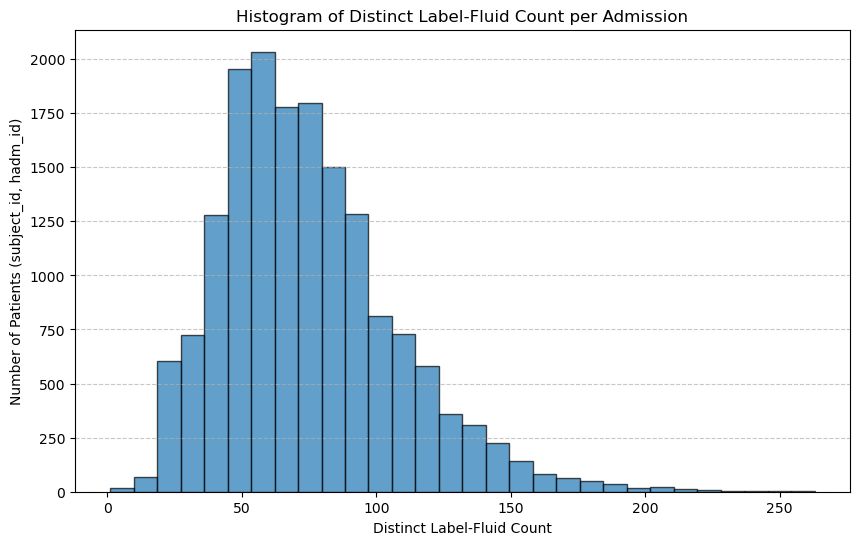

In [35]:
import matplotlib.pyplot as plt

# Extract distinct count values
counts = grouped_counts['distinct_label_fluid_count']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Distinct Label-Fluid Count')
plt.ylabel('Number of Patients (subject_id, hadm_id)')
plt.title('Histogram of Distinct Label-Fluid Count per Admission')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [36]:
null_charttime_count = labevents_df['charttime'].isna().sum()
print(f"Number of null values in charttime: {null_charttime_count}")

Number of null values in charttime: 0


In [38]:
# Reduce to a single test
# Find the earliest charttime per (subject_id, hadm_id)
earliest_charttime_idx = labevents_df.groupby(['subject_id', 'hadm_id','label','fluid'], dropna = False)['charttime'].idxmin()

# Filter down to only those rows
earliest_labevents_df = labevents_df.loc[earliest_charttime_idx]

earliest_labevents_df.shape

(3462246, 19)

In [42]:
# Count distinct subject_id and hadm_id per label, fluid, and category
distinct_counts = earliest_labevents_df.groupby(['label', 'fluid', 'category']).agg(
    distinct_subjects=('subject_id', 'nunique'),
    distinct_hadm_ids=('hadm_id', 'nunique'),
    total_occurrences=('subject_id', 'count')  # Optional: total number of occurrences
).reset_index()

# Sort by distinct hadm_id count (or distinct subject_id count)
distinct_counts.sort_values(by='distinct_subjects', ascending=False, inplace=True)
distinct_counts.head(100)

,label,fluid,category,distinct_subjects,distinct_hadm_ids,total_occurrences
433,Hematocrit,Blood,Hematology,31884,16378,39361
664,Platelet Count,Blood,Hematology,31881,16366,39351
546,MCV,Blood,Hematology,31877,16363,39347
725,Red Blood Cells,Blood,Hematology,31877,16363,39347
712,RDW,Blood,Hematology,31877,16363,39347
544,MCH,Blood,Hematology,31877,16363,39347
545,MCHC,Blood,Hematology,31877,16363,39347
893,White Blood Cells,Blood,Hematology,31868,16363,39338
291,Creatinine,Blood,Chemistry,31675,16321,39128
844,Urea Nitrogen,Blood,Chemistry,31628,16307,39071
